In [5]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm, neighbors
from sklearn.model_selection import train_test_split

In [3]:
# Read data
digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples,-1))
y = digits.target
# 
print(len(X))
print(len(y))

1797
1797


## Train test split to evaluate the performance of model

In [4]:
# Split data into 80% train and 20% test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [7]:
# Create a classifier: a KNeighbors Classifier with number of neighbors = 3
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3)

In [8]:
# Training modek by fitting data to model (one step training)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Predict the value of the digit on the test subset
predicted = knn_clf.predict(X_test)

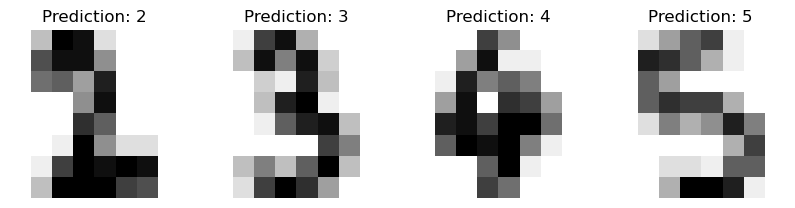

In [10]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [12]:
# Classification report:
print(f"Classification report for classifier {knn_clf}:\n"
      f"{metrics.classification_report(y_test,predicted)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        36
           2       0.97      1.00      0.99        35
           3       0.97      0.89      0.93        37
           4       1.00      0.92      0.96        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.94      0.94      0.94        33
           9       0.94      0.92      0.93        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




Confusion matrix:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  1  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  1  2]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  1  0  2  0  0  0 34]]


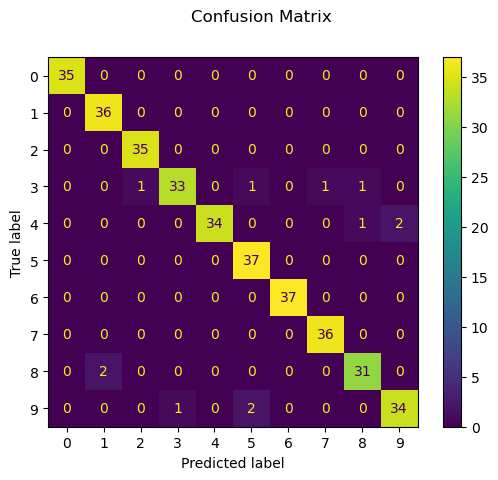

In [13]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [14]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        36
           2       0.97      1.00      0.99        35
           3       0.97      0.89      0.93        37
           4       1.00      0.92      0.96        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.94      0.94      0.94        33
           9       0.94      0.92      0.93        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




# Scale data

In [17]:
#Standard scaler:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
s_scaler = StandardScaler().fit(X_train)
print(s_scaler.mean_)
X_train_scaled = s_scaler.transform(X_train)

[0.00000000e+00 2.86708420e-01 5.17536534e+00 1.17800974e+01
 1.20090466e+01 5.92414753e+00 1.43354210e+00 1.44050104e-01
 6.95894224e-03 1.98121086e+00 1.03931802e+01 1.18872651e+01
 1.02825331e+01 8.34307585e+00 1.89979123e+00 1.18997912e-01
 3.47947112e-03 2.66457898e+00 9.89004871e+00 6.81210856e+00
 7.01391788e+00 7.77244259e+00 1.83646486e+00 5.77592206e-02
 1.39178845e-03 2.50452331e+00 9.10995129e+00 8.72025052e+00
 1.00034795e+01 7.47529576e+00 2.29366736e+00 2.78357690e-03
 0.00000000e+00 2.27696590e+00 7.66666667e+00 9.03270703e+00
 1.03048017e+01 8.72303410e+00 2.85664579e+00 0.00000000e+00
 9.04662491e-03 1.56367432e+00 6.87821851e+00 7.03897008e+00
 7.57411273e+00 8.16423104e+00 3.52887961e+00 3.13152401e-02
 9.04662491e-03 7.22338205e-01 7.54975644e+00 9.42310369e+00
 9.21572721e+00 8.61238692e+00 3.80375783e+00 2.35212248e-01
 6.95894224e-04 2.63048017e-01 5.53653445e+00 1.21085595e+01
 1.19965205e+01 7.02296451e+00 2.29714683e+00 4.41196938e-01]


# Classification with KNN


In [15]:
from sklearn.model_selection import KFold, cross_val_score


In [16]:
def evaluate_KNN(X,y,kfold,n_neighbors):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    return 1 - cross_val_score(knn,X,y,cv = kfold).mean()

Text(0.5, 0, 'Number of neighbors')

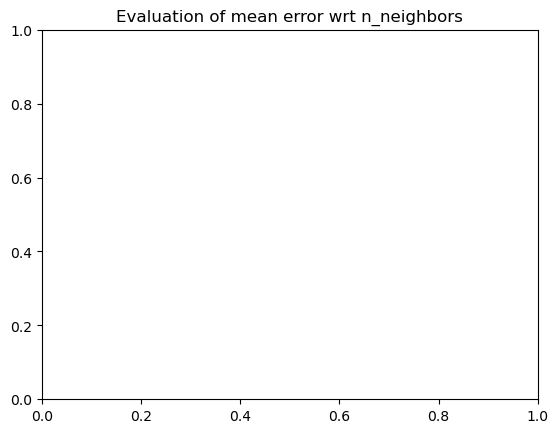

In [18]:
error_holder = []
for n in range(3,100,6):
    error_holder.append(evaluate_KNN(X_train_scaled,y_train,10,n_neighbors=n))
# Implement the plot as described in the task
plot2 = plt.figure()
ax.plot(range(3,100,6),error_holder,marker = '^')
plt.title("Evaluation of mean error wrt n_neighbors")
ax.set_ylabel("mean error")
ax.set_xlabel("Number of neighbors")